### Diplomado en ciencia de datos módulo 6

### Francisco Javier Arellano Salazar

### Proyecto 1

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta, Nadam



In [9]:
# Cargar los datos
df = pd.read_csv("datos_ambientales_numericos.csv")  
df = df[['temperatura', 'presion', 'humedad']]  


In [10]:
# Normalización
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Crear secuencias para entrenamiento (ventanas deslizantes)
def crear_secuencias(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i - n_steps:i, 1:])  # presion y humedad
        y.append(data[i, 0])               # temperatura
    return np.array(X), np.array(y)

n_steps = 10  # Número de pasos temporales
X, y = crear_secuencias(scaled_data, n_steps)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Construir modelo LSTM
model = Sequential()
model.add(LSTM(64, return_sequences=False, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1))  # Predicción de temperatura
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


Epoch 1/50
 2/16 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0840

C:\Users\USUARIO\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\USUARIO\anaconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0700 - val_loss: 0.6610
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0578 - val_loss: 0.5337
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0584 - val_loss: 0.4430
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0538 - val_loss: 0.3612
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0429 - val_loss: 0.2250
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0374 - val_loss: 0.1245
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0295 - val_loss: 0.0975
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0263 - val_loss: 0.1004
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0266 - val_loss: 0.1100
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0287 - val_loss: 0.1482
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0288 - val_loss: 0.1453
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0274 - val_l

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


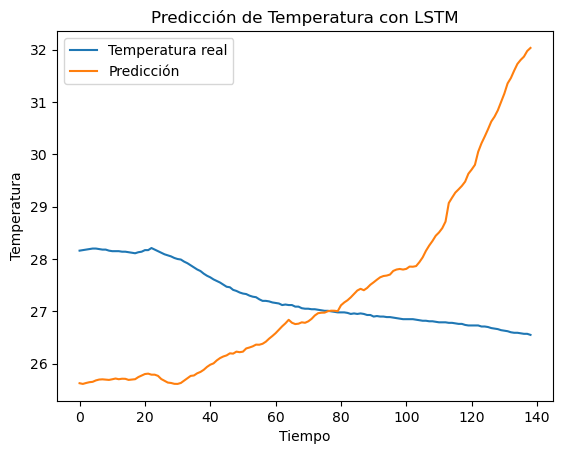

In [11]:
# Evaluar y graficar resultados
predicted = model.predict(X_test)
predicted_temp = scaler.inverse_transform(
    np.hstack((predicted, X_test[:, -1, :]))
)[:, 0]  
real_temp = scaler.inverse_transform(
    np.hstack((y_test.reshape(-1,1), X_test[:, -1, :]))
)[:, 0]

# Gráfico de predicciones vs reales
plt.plot(real_temp, label='Temperatura real')
plt.plot(predicted_temp, label='Predicción')
plt.legend()
plt.title("Predicción de Temperatura con LSTM")
plt.xlabel("Tiempo")
plt.ylabel("Temperatura")
plt.show()


Entrenando con optimizador: Adam


C:\Users\USUARIO\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\USUARIO\anaconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Entrenando con optimizador: SGD
Entrenando con optimizador: RMSprop
Entrenando con optimizador: Adagrad
Entrenando con optimizador: Adadelta
Entrenando con optimizador: Nadam


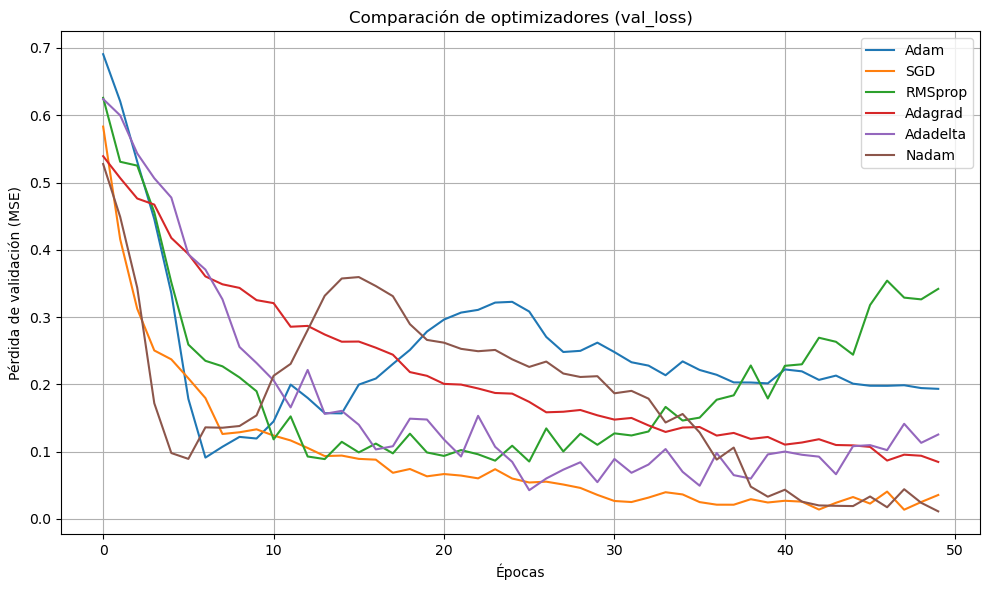


 Mejor optimizador: Nadam


 Modelo guardado como 'modelo_mejor_optimizador.h5'
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [12]:
tf.config.run_functions_eagerly(True)

def crear_modelo(input_shape, optimizer):
    model = Sequential()
    model.add(LSTM(64, return_sequences=False, input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mse')
    return model

def crear_optimizador(nombre):
    """Crear un nuevo optimizador dado su nombre"""
    if nombre == 'Adam':
        return Adam(learning_rate=0.001)
    elif nombre == 'SGD':
        return SGD(learning_rate=0.01, momentum=0.9)
    elif nombre == 'RMSprop':
        return RMSprop(learning_rate=0.001)
    elif nombre == 'Adagrad':
        return Adagrad(learning_rate=0.01)
    elif nombre == 'Adadelta':
        return Adadelta(learning_rate=1.0)
    elif nombre == 'Nadam':
        return Nadam(learning_rate=0.002)
    else:
        raise ValueError(f"Optimizador {nombre} no reconocido")

def probar_y_guardar_mejor_modelo(X_train, y_train, X_test, y_test, optimizers_dict, epochs=30, batch_size=32):
    histories = {}
    val_losses_finales = {}

    for nombre, optim in optimizers_dict.items():
        print(f"Entrenando con optimizador: {nombre}")
        model = crear_modelo((X_train.shape[1], X_train.shape[2]), optim)
        history = model.fit(
            X_train, y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_split=0.1,
            verbose=0
        )
        histories[nombre] = history.history['val_loss']
        val_losses_finales[nombre] = history.history['val_loss'][-1]

    # Graficar pérdidas
    plt.figure(figsize=(10, 6))
    for nombre, val_loss in histories.items():
        plt.plot(val_loss, label=nombre)
    plt.title('Comparación de optimizadores (val_loss)')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida de validación (MSE)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Elegir el mejor optimizador
    mejor_optimizador = min(val_losses_finales, key=val_losses_finales.get)
    print(f"\n Mejor optimizador: {mejor_optimizador}")

    # Reentrenar modelo con mejor optimizador (nuevo optimizador)
    nuevo_optimizer = crear_optimizador(mejor_optimizador)
    mejor_model = crear_modelo((X_train.shape[1], X_train.shape[2]), nuevo_optimizer)
    mejor_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    # Guardar el modelo
    save_model(mejor_model, 'modelo_mejor_optimizador.h5')
    print(" Modelo guardado como 'modelo_mejor_optimizador.h5'")

    # Hacer predicciones
    predicciones = mejor_model.predict(X_test)
    return predicciones, mejor_model, mejor_optimizador

# Definir optimizadores iniciales
optimizadores = {
    'Adam': Adam(learning_rate=0.001),
    'SGD': SGD(learning_rate=0.01, momentum=0.9),
    'RMSprop': RMSprop(learning_rate=0.001),
    'Adagrad': Adagrad(learning_rate=0.01),
    'Adadelta': Adadelta(learning_rate=1.0),
    'Nadam': Nadam(learning_rate=0.002),
}

# Ejecutar
predicciones, modelo_final, mejor_opt = probar_y_guardar_mejor_modelo(
    X_train, y_train, X_test, y_test, optimizadores, epochs=50
)
